# Rally de Datos GTO
## _Semana 3_: Turismo

In [ ]:
# Se importan las librerías para el análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Se define el estilo de las gráficas
sns.set_context('talk')

# Se define la paleta de colores de las gráficas
colors = ["#264653", "#2a9d8f", "#e9C46a", "#F4A261", "#E76F51"]
sns.set_palette(sns.color_palette(colors))

## Lectura de Datasets

In [ ]:
# Se define el url donde se encuentra el archivo (en el repositorio de Github)
url_pp = "https://github.com/GOLF-fisica/Dataket/blob/main/Semana3/pps-a-2021.xlsx?raw=true"

# Se lee el archivo
# Se usa lo del engine porque en deepnote lanzaba error sin esa opción
# Para usar ese engine se necesita instalar previamente (se encuentra en requierements.txt)
df_pp = pd.read_excel(url_pp, sheet_name="pps-aprobado-2021", engine='openpyxl')

In [ ]:
# Se define el url donde se encuentra el archivo (en el repositorio de Github)
url_inversion = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana3/inversiones_aprobado-a-2021.csv"

# Se lee el archivo
df_inversion = pd.read_csv(url_inversion, encoding="latin")

In [ ]:
# Se define el url
url_pp_2020 = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana3/cuenta_publica-a-2020.csv"

# Se lee el archivo
df_pp_2020 = pd.read_csv(url_pp_2020, encoding="latin")

In [ ]:
url_pp_2019 = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana3/cuenta_publica-a-2019.csv"
df_pp_2019 = pd.read_csv(url_pp_2019, encoding="latin")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1,2,4,6,7,8,9,10,11,12,14,16,18,20,22,23,24,25,26,27,28,29,30,32,34,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
url_pp_2018 = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana3/cuenta_publica-a-2018.csv"
df_pp_2018 = pd.read_csv(url_pp_2018, encoding="latin")

In [ ]:
url_obras = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana3/ObrasPublicas2020.csv"

df_obras = pd.read_csv(url_obras)

In [ ]:
url_ods = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana3/alineacion_pp_ods.csv"

df_ods = pd.read_csv(url_ods, encoding="latin")

## Proyectos de inversión aprobados 2021 y sus ODS

In [ ]:
# Se agrupa la base de inversiones por Pp
df_gasto_inversion = df_inversion.groupby("id_programa_presupuestario").sum()

# Se hace un left join con la base de datos de Pp y ODS
df_inversion_ods = df_gasto_inversion.join(df_ods.set_index("id_programa_presupuestario")["id_ods"]).drop_duplicates()

In [ ]:
# Se filtra de la base de datos sólo aquellos registros del ODS 8, 9 u 11
filtro_ods_8 = df_inversion_ods["id_ods"]==8
filtro_ods_9 = df_inversion_ods["id_ods"]==9
filtro_ods_11 = df_inversion_ods["id_ods"]==11

df_inversion_ods_turismo = df_inversion_ods[filtro_ods_8 | filtro_ods_9 | filtro_ods_11].sort_values("aprobado", ascending=False)
df_inversion_ods_turismo["ODS"] = df_inversion_ods_turismo["id_ods"].copy()

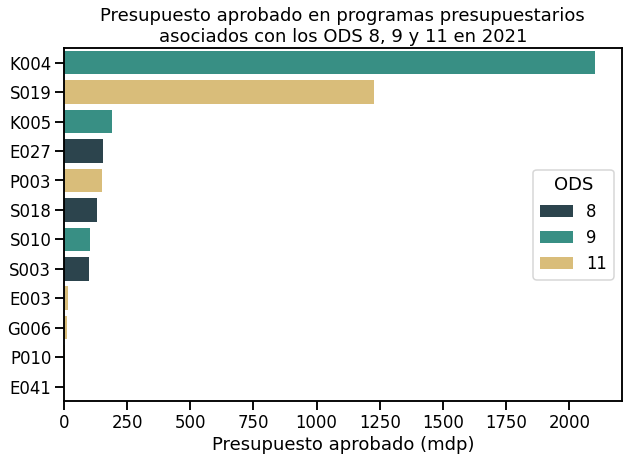

In [ ]:
plt.figure(figsize=(10, 6.5))
sns.barplot(x=df_inversion_ods_turismo["aprobado"]/1_000_000,
            y=df_inversion_ods_turismo.index, hue=df_inversion_ods_turismo["ODS"],
            dodge=False)

plt.title("Presupuesto aprobado en programas presupuestarios\nasociados con los ODS 8, 9 y 11 en 2021")
plt.ylabel("")
plt.xlabel("Presupuesto aprobado (mdp)")


plt.show()

In [ ]:
# El gasto aprobado por Pp
df_inversion_ods_turismo[["ODS", "aprobado"]]

,ODS,aprobado
id_programa_presupuestario,,
K004,9,2.102400e+09
S019,11,1.225688e+09
K005,9,1.920000e+08
E027,8,1.557861e+08
P003,11,1.497087e+08
S018,8,1.300000e+08
S010,9,1.030000e+08
S010,8,1.030000e+08
S003,8,9.820000e+07


In [ ]:
# Total del presupuesto (con el presupuesto del S010 duplicado)
df_inversion_ods_turismo["aprobado"].sum()/1_000_000

4294.2259534

In [ ]:
# Las metas sobre los ODS 8, 9 y 11
df_ods[df_ods["id_ods"].isin([8, 9, 11])][["id_programa_presupuestario", "descripcion_programa_presupuestario", "descripcion_meta"]].drop_duplicates()

,id_programa_presupuestario,descripcion_programa_presupuestario,descripcion_meta
3,E036,Divulgación de la ciencia y la tecnología,9.5 Aumentar la investigación científica y mej...
5,S016,"Investigación, desarrollo tecnológico, transfe...",9.5 Aumentar la investigación científica y mej...
62,P003,"Desarrollo regional, urbano y ordenamiento eco...","11.b Para 2020, aumentar el número de ciudades..."
65,P003,"Desarrollo regional, urbano y ordenamiento eco...",11.1 Asegurar el acceso de todas las personas ...
79,E028,Desarrollo integral de los jóvenes guanajuatenses,8.5 Lograr el empleo pleno y productivo y el t...
80,E027,Derrama económica por turismo,8.9 Elaborar y poner en práctica políticas enc...
89,E003,Actividades artísticas y culturales,11.4 Redoblar los esfuerzos para proteger y sa...
109,K005,Logística para los negocios,9.2 Promover una industrialización inclusiva y...
110,S018,Capital Humano,8.3 Promover políticas orientadas al desarroll...
117,S010,Cadena de valor y fortalecimiento de la produc...,9.c Aumentar significativamente el acceso a la...


## Obras 2020 y su asociación con Pp's

In [ ]:
# Se filtran las obras concluidas
df_obras_concluidas = df_obras[df_obras["id_estatus"]==1].drop(["id_estatus",
                                                                "descripcion_estatus"], axis=1)

# Se agrupan las obras por proyecto
proyectos = df_obras_concluidas.groupby("id_proyecto").sum()

# Se hace una relación de proyectos con su Pp (usando la cuenta pública del 2020)
proyectos_pp = proyectos.join(df_pp_2020.set_index("id_proceso_proyecto")["id_programa_presupuestario"]).drop_duplicates().fillna("nan")

In [ ]:
# Número de obras concluidas en 2020
len(df_obras_concluidas)

1462

In [ ]:
# Número de proyectos asociados a las obras concluidas en 2020
len(proyectos)

152

In [ ]:
# Presupuesto aprobado a las obras concluidas en 2020
proyectos["importe_presupuestal_estatal_2020"].sum()

3706343633.098904

In [ ]:
# Se hace una relación parecida para las cuentas públicas del 2019 y 2018
proyectos_pp_2019 = proyectos.join(df_pp_2019.set_index("id_proceso_proyecto")["id_programa_presupuestario"]).drop_duplicates()
proyectos_pp_2018 = proyectos.join(df_pp_2018.set_index("id_proceso_proyecto")["id_programa_presupuestario"]).drop_duplicates()

In [ ]:
# Los proyectos que no se encuentran en la cuenta pública del 2020
proyectos_pp[proyectos_pp["id_programa_presupuestario"]=="nan"]

,ciclo,id_eje,id_obra,id_municipio,latitud,importe_presupuestal_estatal_2020,id_programa_presupuestario
Q0103,10100.0,10,1254.0,141.0,104.553830,3.116137e+06,nan
Q0289,2020.0,4,1571.0,28.0,20.197397,3.207201e+06,nan
Q0304,4040.0,6,3659.0,34.0,42.305462,9.181268e+05,nan
Q0541,2020.0,4,2050.0,23.0,20.442623,4.551933e+06,nan
Q0574,2020.0,4,2051.0,35.0,20.642176,2.167060e+07,nan
Q0593,4040.0,8,4105.0,30.0,41.891016,2.141035e+06,nan
Q0893,12120.0,24,12519.0,66.0,123.014640,2.610703e+07,nan
Q1470,4040.0,8,4313.0,50.0,42.120768,1.958789e+06,nan
Q2064,179780.0,267,266600.0,1769.0,1848.854964,1.237585e+08,nan
Q2445,2020.0,4,3206.0,27.0,20.540384,1.114196e+06,nan


In [ ]:
# Se rellenan los campos que no se encuentrann en la cuenta pública del 2020
# Se hace un repaso con la base de datos de 2019
for i in range(len(proyectos_pp)):
    if proyectos_pp["id_programa_presupuestario"][i]=="nan":
        proyectos_pp.iloc[i, -1] = proyectos_pp_2019[proyectos_pp_2019.index==proyectos_pp.index[i]]["id_programa_presupuestario"][0]

proyectos_pp = proyectos_pp.fillna("nan")

# Se repasa con la de 2018
for i in range(len(proyectos_pp)):
    if proyectos_pp["id_programa_presupuestario"][i]=="nan":
        proyectos_pp.iloc[i, -1] = proyectos_pp_2018[proyectos_pp_2018.index==proyectos_pp.index[i]]["id_programa_presupuestario"][0]

In [ ]:
# La etrada que no pudo asociarse a algún Pp con los datos de las cuentas 2018 a 2020
proyectos_pp[proyectos_pp["id_programa_presupuestario"].isnull()]

,ciclo,id_eje,id_obra,id_municipio,latitud,importe_presupuestal_estatal_2020,id_programa_presupuestario
Q0289,2020.0,4,1571.0,28.0,20.197397,3207200.85,NaN


El dato anterior es de un proyecto del 2016 para atender la infraestructura del [Instituto Tecnológico de Salvatierra](http://www.itess.edu.mx/LGCG%20_LDF/docus_LGCG%20_LDF/2016/INFORMACION%20PRESUPUESTARIA/DIC%2016/PPI-GTO-ITSV-4T-16.pdf), por esto, puede que su Pp sea el __E017__, que atiende a la _Cobertura de Educación Media Superior y Superior_. Sin embargo, como no es un dato certero, se omitirá.

In [ ]:
# Los proyectos concluidos en 2020
proyectos_pp_no_nan = proyectos_pp.dropna()

# Un df que se modificará para tener una linda gráfica
df_dummy = proyectos_pp_no_nan.copy()
df_dummy["Proyectos"] = proyectos_pp_no_nan.index

# Se añade un directorio base y se coloca el presupuesto en términos de mdp
df_dummy["Programas Presupuestarios"] = "Proyectos de las obras concluidas en 2020 por Pp"
df_dummy["Importe presupuestal 2020 (mdp)"] = round(df_dummy["importe_presupuestal_estatal_2020"].copy()/1_000_000, 2)

fig = px.treemap(df_dummy,
                 path=["Programas Presupuestarios", "id_programa_presupuestario", "Proyectos"],
                 values="Importe presupuestal 2020 (mdp)", color_discrete_sequence=px.colors.sequential.Aggrnyl)

plotly.offline.plot(fig, filename='/work/treemap_obras.html')

fig.show()

## Los Pp's asociados al ODS 8

In [ ]:
# Se filtran los registros que pertenecen al ODS 8: Trabajo decente y crecimiento económico
# además, se omiten las columnas que se hacen redundantes (pues refieren al ODS)
df_ods_8 = df_ods[df_ods["id_ods"]==8].drop(["id_ods", "descripcion_ods"], axis=1)

In [ ]:
# Se calcula el presupuesto aprobado por PP
pp_dinero = df_pp.groupby("id_programa_presupuestario").sum()["aprobado"]

In [ ]:
# Left join del df_ods_8 con el presupuesto aprobado en 2021 por Pp
df_ods_8_importe = df_ods_8[["id_eje", "id_programa_presupuestario"]].set_index("id_programa_presupuestario").join(pp_dinero).drop_duplicates()

# Left join del df_ods_8 con el presupuesto aprobado en 2021 por Pp
df_ods_8_full = df_ods_8_importe.join(df_pp.set_index("id_programa_presupuestario")["descripcion_division"]).drop_duplicates()

In [ ]:
# El presupuesto total para Pp's asociados al ODS 8 en 2021
df_ods_8_importe["aprobado"].sum()

826841644.8699999

In [ ]:
# Los Pp's asociados al ODS 8

# Un df que se modificará para tener una linda gráfica
df_dummy = df_ods_8_full.copy()

# Se cambian los nombres de las dependencias por sus siglas
diccionario = {"Instituto Estatal de Capacitación": "Instituto Estatal de Capacitación",
               "Secretaría de Desarrollo Económico Sustentable": "Secretaría de Desarrollo Económico Sustentable",
               "Secretaría de Desarrollo Social y Humano": "Secretaría de Desarrollo Social y Humano",
               "Secretaría de Turismo": "Secretaría de Turismo",
               "Sistema Estatal Para el desarrollo Integral de la Familia": "DIF",
               "Instituto Guanajuatense para las Personas con Discapacidad": "INGUDIS",
               "Secretaría de Gobierno": "Secretaría de Gobierno",
               "Instituto de Financiamiento e Información para la Educación": "Instituto de Financiamiento e Información para la Educación"}
df_dummy["Siglas de la dependencia"] = df_dummy["descripcion_division"].map(diccionario)

# Se añade un directorio base y se coloca el presupuesto en términos de mdp
df_dummy["id_programa_presupuestario"] = df_ods_8_full.index
df_dummy["ODS"] = "Programas presupuestarios asociados al ODS 8"
df_dummy["Presupuesto aprobado 2021 (mdp)"] = round(df_dummy["aprobado"].copy()/1_000_000, 2)
df_dummy["Programas por dependencia"] = 1

fig = px.treemap(df_dummy,
                 path=["ODS", "Siglas de la dependencia", "id_programa_presupuestario"],
                 values="Programas por dependencia", color_discrete_sequence=px.colors.sequential.Aggrnyl)#values="Presupuesto aprobado 2021 (mdp)", color_discrete_sequence=px.colors.sequential.Aggrnyl)

plotly.offline.plot(fig, filename='/work/treemap_ods_8.html')

fig.show()

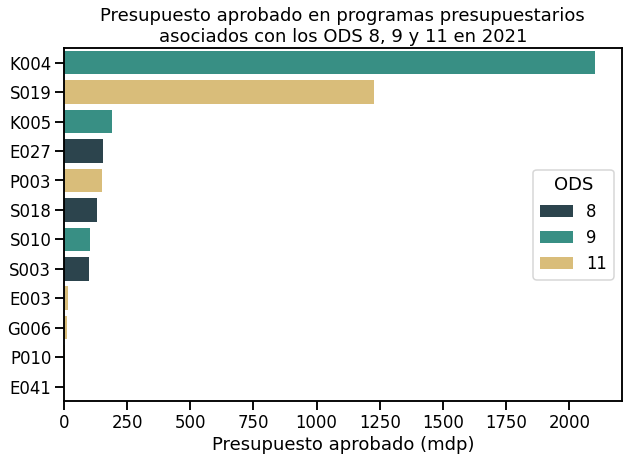

In [ ]:
plt.figure(figsize=(10, 6.5))
sns.barplot(x=df_inversion_ods_turismo["aprobado"]/1_000_000,
            y=df_inversion_ods_turismo.index, hue=df_inversion_ods_turismo["ODS"],
            dodge=False)

plt.title("Presupuesto aprobado en programas presupuestarios\nasociados con los ODS 8, 9 y 11 en 2021")
plt.ylabel("")
plt.xlabel("Presupuesto aprobado (mdp)")


plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4bc57e-4c7f-45aa-9717-e768f0d35a31' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>